In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [ ]:
client = MongoClient('### DB_URL_HERE ###')
research_col = client['db1']['research']
data = research_col.find({})
df_all = pd.DataFrame(data)
# df_all = pd.read_csv('2018_ML_V3.csv')


display(df_all.head())

,_id,Title,ref_count,Author_count,Subject_area_count,Unique_affiliations_count,Open_access,subtype,Cite_count
0,67553ddfeb5d0df312c8caf8,Public health and international epidemiology f...,76.0,2,1,6,0.0,ch,1.0
1,67553ddfeb5d0df312c8caf9,Flexible Printed Active Antenna for Digital Te...,4.0,2,2,1,0.0,cp,1.0
2,67553ddfeb5d0df312c8cafa,Parametric study of hydrogen production via so...,42.0,4,3,1,0.0,ar,21.0
3,67553ddfeb5d0df312c8cafb,Superhydrophobic coating from fluoroalkylsilan...,45.0,8,5,6,0.0,ar,37.0
4,67553ddfeb5d0df312c8cafc,Electrochemical impedance-based DNA sensor usi...,55.0,6,4,4,0.0,ar,68.0


In [25]:
df_old = pd.read_csv('2018_ML_V3.csv')

df_all.shape
df_old.head()

,title,ref_count,author_count,subject_area_count,unique_affiliations_count,open_access,subtype,cite_count
0,Public health and international epidemiology f...,76.0,2,1,6,0.0,ch,1
1,Flexible Printed Active Antenna for Digital Te...,4.0,2,2,1,0.0,cp,1
2,Parametric study of hydrogen production via so...,42.0,4,3,1,0.0,ar,21
3,Superhydrophobic coating from fluoroalkylsilan...,45.0,8,5,6,0.0,ar,37
4,Electrochemical impedance-based DNA sensor usi...,55.0,6,4,4,0.0,ar,68


In [24]:
# value count each columns
for col in df_all.columns:
    # print(col)
    print(df_all[col].value_counts())
    # print()

_id
67553ddfeb5d0df312c8caf8    1
67554518eb5d0df312c8ff9a    1
67554518eb5d0df312c8ffa1    1
67554518eb5d0df312c8ffa0    1
67554518eb5d0df312c8ff9f    1
                           ..
67554281eb5d0df312c8e54a    1
67554281eb5d0df312c8e549    1
67554281eb5d0df312c8e548    1
67554281eb5d0df312c8e547    1
675545cdeb5d0df312c919ef    1
Name: count, Length: 20216, dtype: int64
Title
Preface                                                                                                                                      18
Message from General Chair                                                                                                                    6
Introduction                                                                                                                                  4
Foreword                                                                                                                                      4
What is your diagnosis?                    

In [28]:
df_omit_subtype = df_all.drop(columns=['subtype', 'Title', '_id'])
print(df_omit_subtype.shape)
# null count each columns
# for col in df_omit_subtype.columns:
#     print(col, df_omit_subtype[col].isnull().sum())

# drop null
df_omit_subtype_dropna = df_omit_subtype.dropna(axis=0)
print(df_omit_subtype_dropna.shape)

# for col in df_omit_subtype_dropna.columns:
#     print(col, df_omit_subtype_dropna[col].isnull().sum())

(20216, 6)
(18184, 6)


In [29]:

df_omit_subtype_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18184 entries, 0 to 20215
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ref_count                  18184 non-null  float64
 1   Author_count               18184 non-null  int64  
 2   Subject_area_count         18184 non-null  int64  
 3   Unique_affiliations_count  18184 non-null  int64  
 4   Open_access                18184 non-null  float64
 5   Cite_count                 18184 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 994.4 KB


In [30]:
df = df_omit_subtype_dropna

df.Cite_count.min()

0.0

In [31]:
bins = [0,10,20,30,40,50,60,70,80,90,100, np.inf]


bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'more']
df['cc_bin'] = pd.cut(df['Cite_count'], bins=bins, labels=bin_labels, right=False)

display(df)
df = df.drop(columns=['Cite_count'])



C:\Users\sonso\AppData\Local\Temp\ipykernel_35508\3042323318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cc_bin'] = pd.cut(df['Cite_count'], bins=bins, labels=bin_labels, right=False)


,ref_count,Author_count,Subject_area_count,Unique_affiliations_count,Open_access,Cite_count,cc_bin
0,76.0,2,1,6,0.0,1.0,0-10
1,4.0,2,2,1,0.0,1.0,0-10
2,42.0,4,3,1,0.0,21.0,20-30
3,45.0,8,5,6,0.0,37.0,30-40
4,55.0,6,4,4,0.0,68.0,60-70
...,...,...,...,...,...,...,...
20211,63.0,5,2,2,0.0,3.0,0-10
20212,115.0,3,1,1,0.0,11.0,10-20
20213,76.0,1,1,2,1.0,5.0,0-10
20214,44.0,4,2,2,0.0,6.0,0-10


In [ ]:
# from sklearn.model_selection import train_test_split
# # Features and target
# X = df.drop(columns=["cc_bin"])  # All columns except the target
# y = df["cc_bin"]  # The target

# # Split into train (80%) and test (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)


In [ ]:
# X_test.shape

,ref_count,Author_count,Subject_area_count,Unique_affiliations_count,Open_access,cc_bin,cc_bin_encoded
0,76.0,2,1,6,0.0,0-10,0.0
1,4.0,2,2,1,0.0,0-10,0.0
2,42.0,4,3,1,0.0,20-30,2.0
3,45.0,8,5,6,0.0,30-40,3.0
4,55.0,6,4,4,0.0,60-70,6.0
...,...,...,...,...,...,...,...
20211,63.0,5,2,2,0.0,0-10,0.0
20212,115.0,3,1,1,0.0,10-20,1.0
20213,76.0,1,1,2,1.0,0-10,0.0
20214,44.0,4,2,2,0.0,0-10,0.0


0        0.0
1        0.0
2        2.0
3        3.0
4        6.0
        ... 
20211    0.0
20212    1.0
20213    0.0
20214    0.0
20215    0.0
Name: cc_bin_encoded, Length: 18184, dtype: float64

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85      2681
         1.0       0.17      0.01      0.02       497
         2.0       0.24      0.02      0.04       188
         3.0       0.23      0.04      0.07       113
         4.0       0.00      0.00      0.00        47
         5.0       0.00      0.00      0.00        32
         6.0       0.00      0.00      0.00        17
         7.0       0.00      0.00      0.00         8
         8.0       0.00      0.00      0.00        10
         9.0       0.00      0.00      0.00         7
        10.0       0.11      0.03      0.04        37

    accuracy                           0.74      3637
   macro avg       0.14      0.10      0.09      3637
weighted avg       0.60      0.74      0.64      3637



c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

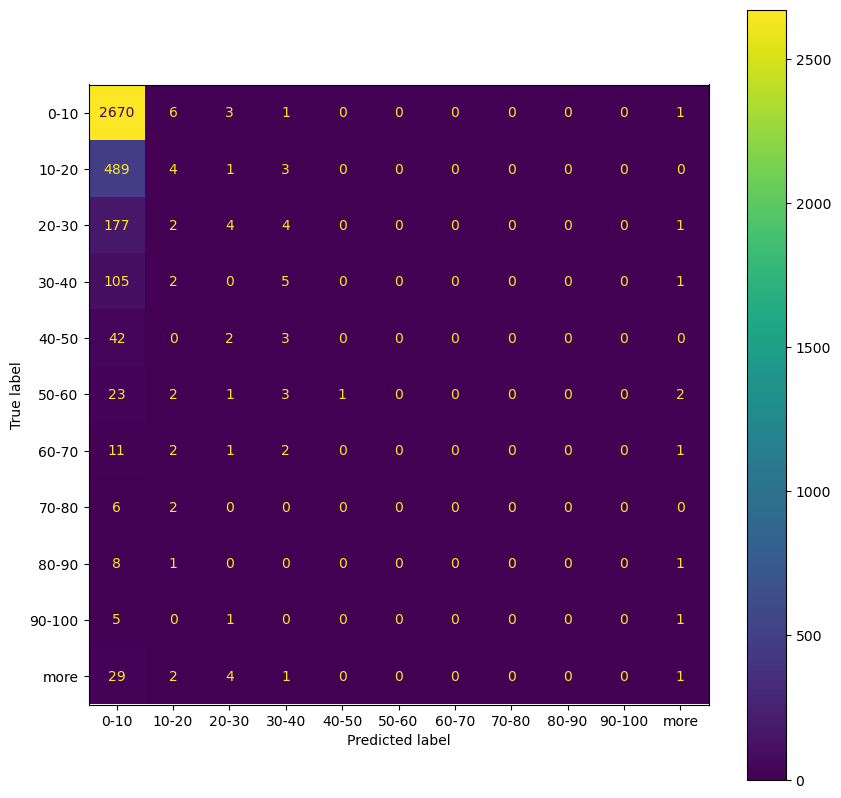

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
# bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'more']


encoder = OrdinalEncoder(categories=[bin_labels])  # Specify categories for ordinal encoding
df['cc_bin_encoded'] = encoder.fit_transform(df[['cc_bin']])

X = df.drop(columns=["cc_bin", "cc_bin_encoded"])  # Drop the target columns
y = df["cc_bin_encoded"]  # The target with ordinal encoding
display(df)
display(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=10,
                               min_samples_leaf=4,
                               min_samples_split=2,
                               n_estimators=50,
                               )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report_ = classification_report(y_test, y_pred, output_dict=True)
report_read = classification_report(y_test, y_pred)

print(report_read)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()



In [41]:
# # Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_).transpose()

# Save the DataFrame to a CSV file
# report_df.to_csv('classification_report.csv', index=True)
report_df


,precision,recall,f1-score,support
0.0,0.749789,0.995897,0.855495,2681.000000
1.0,0.250000,0.012072,0.023033,497.000000
2.0,0.210526,0.021277,0.038647,188.000000
3.0,0.238095,0.044248,0.074627,113.000000
4.0,0.000000,0.000000,0.000000,47.000000
5.0,0.000000,0.000000,0.000000,32.000000
6.0,0.000000,0.000000,0.000000,17.000000
7.0,0.000000,0.000000,0.000000,8.000000
8.0,0.000000,0.000000,0.000000,10.000000
9.0,0.000000,0.000000,0.000000,7.000000


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2681
         1.0       0.25      0.01      0.02       497
         2.0       0.21      0.02      0.04       188
         3.0       0.24      0.04      0.07       113
         4.0       0.00      0.00      0.00        47
         5.0       0.00      0.00      0.00        32
         6.0       0.00      0.00      0.00        17
         7.0       0.00      0.00      0.00         8
         8.0       0.00      0.00      0.00        10
         9.0       0.00      0.00      0.00         7
        10.0       0.20      0.05      0.09        37

    accuracy                           0.74      3637
   macro avg       0.15      0.10      0.10      3637
weighted avg       0.61      0.74      0.64      3637



c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sonso\miniconda3\envs\dsde\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


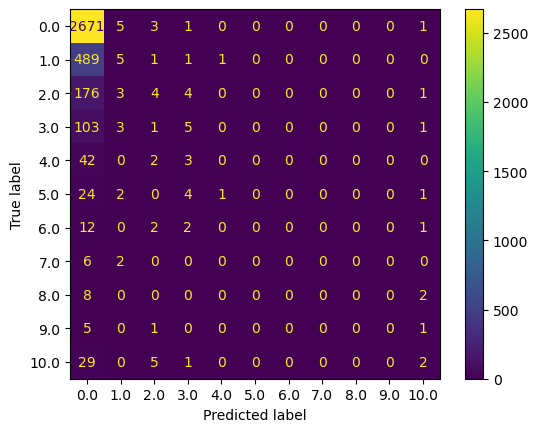

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Create the RandomForestClassifier model
model = RandomForestClassifier(random_state=31)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot()
